<a href="https://colab.research.google.com/github/Beebruna/Treinamento_Data_Science/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST é a sigla para "Modified National Institute of Standards and Technology" - Instituto Nacional de Padrões e Tecnologia Modificado, que se refere a um conjunto de dados muito popular.

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0

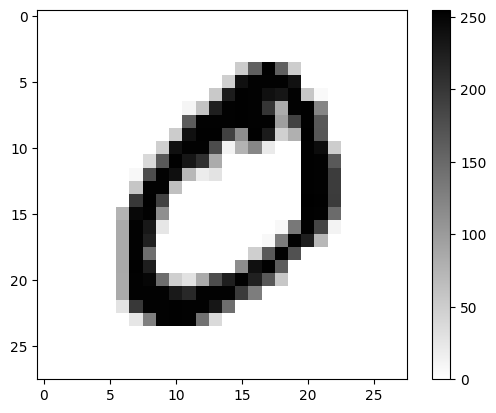

In [ ]:
plt.figure()
plt.imshow(train_images[1], cmap='binary')
plt.colorbar()
train_labels[1]

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

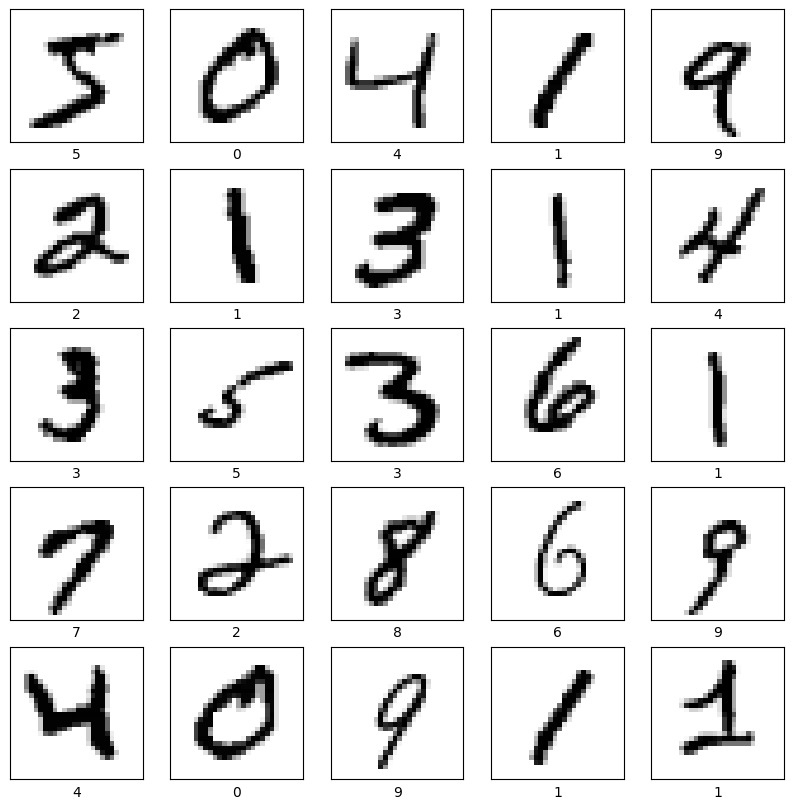

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i], cmap='binary')
    ax.set_xlabel(train_labels[i])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # primeira camada
    keras.layers.Dense(128, activation=tf.nn.relu), # segunda camada
    keras.layers.Dense(10, activation=tf.nn.softmax) # terceira/última camada = quantidade de classes
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8137 - accuracy: 0.5010
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8224 - accuracy: 0.7982
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5480 - accuracy: 0.8559
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4519 - accuracy: 0.8771
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4041 - accuracy: 0.8876


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 80.5939 - accuracy: 0.7192


In [ ]:
test_loss

80.59391784667969

In [ ]:
test_accuracy

0.7192000150680542